In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
import seaborn as sns

warnings.filterwarnings('ignore', category = DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_table('diabetes.txt', names = ['id', 'date', 'time', 'code', 'value'])

In [4]:
df.tail()

,id,date,time,code,value
29325,70,05-09-1989,08:00,33,001
29326,70,05-09-1989,08:00,34,007
29327,70,05-10-1989,08:00,34,007
29328,70,05-11-1989,08:00,34,007
29329,70,05-12-1989,08:00,34,007


In [5]:
df.shape  #for 70 records in total

(29330, 5)

In [6]:
df.dtypes

id        int64
date     object
time     object
code      int64
value    object
dtype: object

In [7]:
#making a single datetime stamp instead of using a date and time column separately
df['timestamp'] = df['date'] + ' ' + df['time']

In [8]:
df.head()

,id,date,time,code,value,timestamp
0,1,04-21-1991,9:09,58,100,04-21-1991 9:09
1,1,04-21-1991,9:09,33,009,04-21-1991 9:09
2,1,04-21-1991,9:09,34,013,04-21-1991 9:09
3,1,04-21-1991,17:08,62,119,04-21-1991 17:08
4,1,04-21-1991,17:08,33,007,04-21-1991 17:08


In [9]:
df.tail()

,id,date,time,code,value,timestamp
29325,70,05-09-1989,08:00,33,001,05-09-1989 08:00
29326,70,05-09-1989,08:00,34,007,05-09-1989 08:00
29327,70,05-10-1989,08:00,34,007,05-10-1989 08:00
29328,70,05-11-1989,08:00,34,007,05-11-1989 08:00
29329,70,05-12-1989,08:00,34,007,05-12-1989 08:00


In [10]:
print((df['timestamp'][0]))

04-21-1991 9:09


In [11]:
dele=[]
for i in range(29330):
    try:
        d=pd.to_datetime(df['timestamp'][i])
        if(df['timestamp'][i]=="06-31-1991 07:50"):
            dele.append(i)
    except:
        dele.append(i)

In [12]:
len(dele)

12

In [13]:
dele

[6505, 6506, 6507, 6508, 6509, 6510, 6511, 28070, 28071, 28072, 28171, 28172]

In [14]:
df=df.drop(dele)

In [15]:
len(df)

29318

In [16]:
df['datetime'] = pd.to_datetime(df['timestamp'])

In [17]:
df.shape

(29318, 7)

In [18]:
df['value'] = pd.to_numeric(df['value'],errors='coerce')

In [19]:
df.dtypes

id                    int64
date                 object
time                 object
code                  int64
value               float64
timestamp            object
datetime     datetime64[ns]
dtype: object

In [20]:
df=df.dropna()

<AxesSubplot:xlabel='value'>

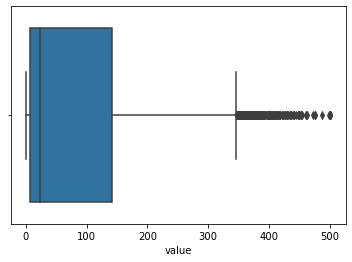

In [21]:
sns.boxplot(x=df['value'])

In [23]:
X= df.drop(['value','date','time','timestamp','datetime'], axis=1).values

y = df['value'].values

In [24]:
y.shape

(29244,)

In [25]:
X[0]

array([ 1, 58], dtype=int64)

In [27]:
import functions

best parameters:


{'alpha': 1e-10}
-5008.932115816993
Training accuracy : 0.42495

Testing accuracy : 0.42308
training accuracy using cross validation for  2  splits: 0.4247208496076768
testing accuracy using cross validation for  2  splits: 0.41979102098979115
training accuracy using cross validation for  6  splits: 0.4248885918518748
testing accuracy using cross validation for  6  splits: 0.4214229015132081
training accuracy using cross validation for  10  splits: 0.4248744242489382
testing accuracy using cross validation for  10  splits: 0.4217877438637786
training accuracy using cross validation for  14  splits: 0.4247533279431437
testing accuracy using cross validation for  14  splits: 0.42093930033655536
training accuracy using cross validation for  18  splits: 0.4247196005978011
testing accuracy using cross validation for  18  splits: 0.42091927081907676
training accuracy using cross validation for  22  splits: 0.42421402629631366
testing accuracy using cross validation for  22

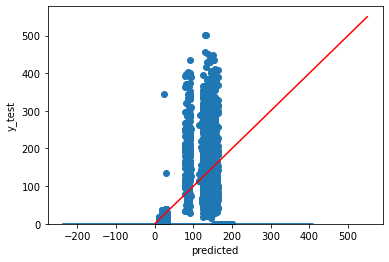

In [28]:
functions.lasso(X,y)

best parameter and the score:

{'alpha': 1e-08}
-5008.932115816993


Training accuracy : 0.42495

Testing accuracy : 0.42308
training accuracy using cross validation for  2  splits: 0.424720773536081
testing accuracy using cross validation for  2  splits: 0.41984567774689613
training accuracy using cross validation for  6  splits: 0.42488858236170013
testing accuracy using cross validation for  6  splits: 0.42142183204508177
training accuracy using cross validation for  10  splits: 0.42487440050734293
testing accuracy using cross validation for  10  splits: 0.4217869691652525
training accuracy using cross validation for  14  splits: 0.42475329023028696
testing accuracy using cross validation for  14  splits: 0.4209371388627866
training accuracy using cross validation for  18  splits: 0.4247195963726245
testing accuracy using cross validation for  18  splits: 0.42091682917813045
training accuracy using cross validation for  22  splits: 0.4242140230931615
testing accuracy using cross val

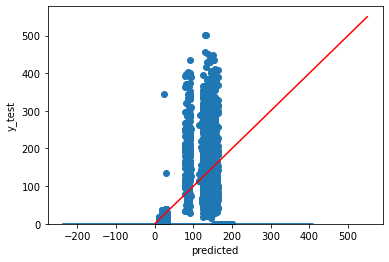

In [29]:
functions.ridge(X,y)

MLR Model
    0   1   MEDV  Predicted MEDV
0  31  48  202.0       85.319190
1  29  48  150.0       84.883135
2  52  64   80.0      162.788882
3  65  33   15.0       24.396703
4  67  60  240.0      147.836516
5  68  60  162.0      148.054543
6  28  60   88.0      139.333444
7  65  33   17.0       24.396703
8   3  63  247.0      147.549842
9  28  62  132.0      148.444834



Training accuracy : 0.42356

Testing accuracy : 0.42865


training accuracy using cross validation for  2  splits: 0.42341755687621424
testing accuracy using cross validation for  2  splits: 0.4271190203674475
training accuracy using cross validation for  6  splits: 0.42336710269704275
testing accuracy using cross validation for  6  splits: 0.42782767751163675
training accuracy using cross validation for  10  splits: 0.4233082215060483
testing accuracy using cross validation for  10  splits: 0.4265192012030588
training accuracy using cross validation for  14  splits: 0.42298640637893087
testing accuracy using cross v

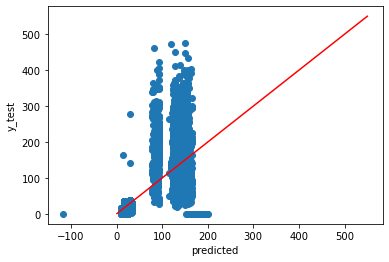

In [30]:
functions.mlr(X,y)

Training accuracy : 0.48877

Testing accuracy : 0.49478

training accuracy using cross validation for  2  splits: 0.44771978709121096
testing accuracy using cross validation for  2  splits: 0.45267232569371996
training accuracy using cross validation for  6  splits: 0.4287942316939816
testing accuracy using cross validation for  6  splits: 0.4442550963388306
training accuracy using cross validation for  10  splits: 0.44488643150852514
testing accuracy using cross validation for  10  splits: 0.4110235244645065
training accuracy using cross validation for  14  splits: 0.47015865405142326
testing accuracy using cross validation for  14  splits: 0.4355167705041212
training accuracy using cross validation for  18  splits: 0.44152727870599207
testing accuracy using cross validation for  18  splits: 0.45393511788373797
training accuracy using cross validation for  22  splits: 0.4460170681148622
testing accuracy using cross validation for  22  splits: 0.4691399502644879
training accuracy using

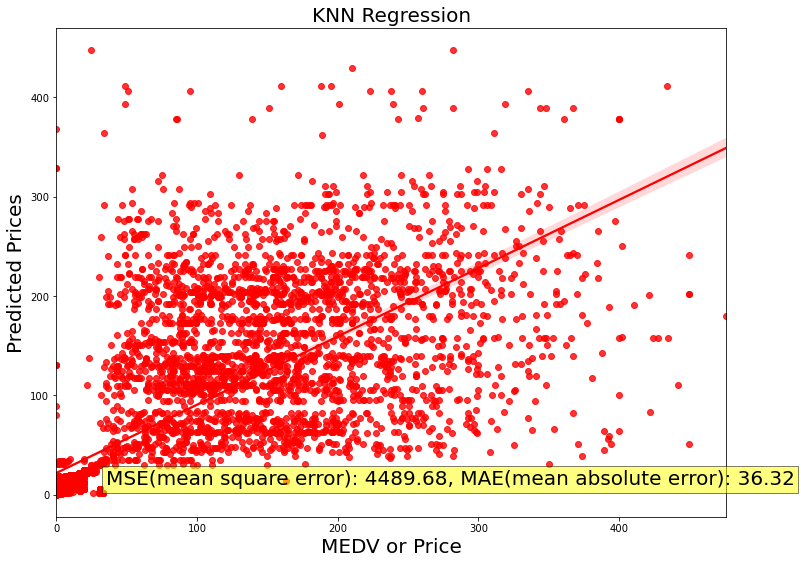

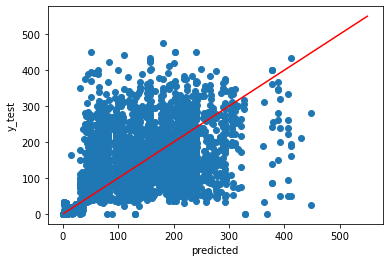

In [31]:
functions.knn(X,y)

In [32]:
functions.kernel_cobra_diabetes(X,y)

KeyboardInterrupt: 